# Équation différentielle de la chute d'une pierre, sans et avec frottements

On définit la fonction f(t,y) de l'équation différentielle y'=f(t,y). Elle peut dépendre de paramètres (params) qu'on devra fixer avant de résoudre.

In [1]:
def f(t,y,params):
     return[y[2],
            y[3],
           -params[2]/params[1]*sqrt(y[2]^2+y[3]^2)*y[2],
           -params[0]-params[2]/params[1]*sqrt(y[2]^2+y[3]^2)*y[3]]

On crée un "solveur", c'est-à-dire un objet qui sert à résoudre l'équation différentielle. Ici, on l'appelle U.
On associe à ce solveur la fonction définie plus haut.

In [2]:
U=ode_solver()
U.function=f

On lance le solveur pour une condition initiale y_0, un intervalle de temps t_span, des valeurs de paramètres params et un nombre de points dans l'intervalle où on veut la valeur approchée de la solution.

In [3]:
U.ode_solve(y_0=[0,0,5,10],
            t_span=[0,2],
            params=[9.81,10,0],
            num_points=100)

À partir de maintenant, la solution approchée est stockée dans la variable U.solution. C'est en fait juste une liste de valeurs approchées de la solution, pour chaque valeur de t dans la subdivision de t_span en num_points points.

On peut demander de fabriquer des fonctions interpolées à partir de ces listes de valeurs, pour pouvoir ensuite demander la valeur de la solution approchée en tout point (pas seulement aux points de la subdivision).

In [4]:
u=U.interpolate_solution()
v=U.interpolate_solution(i=1)

On crée une séquence de paires avec les deux coordonnées d'une solution, pour pouvoir la tracer.

In [5]:
seq=[(u(0.1*i),v(0.1*i)) for i in range(200)]

On crée un objet graphique "mondessin" et on lui rajoute le traçage (plot) des points donnés, en les joignant.

In [6]:
mondessin=Graphics()
mondessin+=list_plot(seq,plotjoined=True)

On demande l'affichage de l'objet graphique.

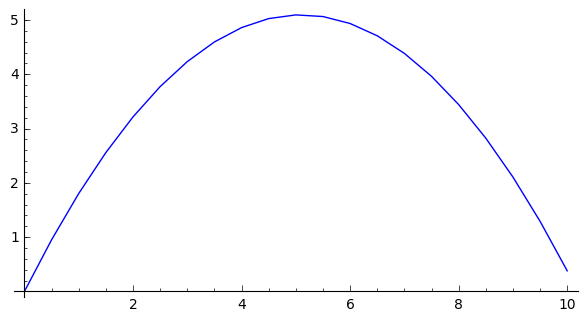

In [7]:
mondessin.show(aspect_ratio=1)

On recommence avec de nouvelles valeurs des paramètres.

In [8]:
U.ode_solve(y_0=[0,0,5,10],
            t_span=[0,2],
            params=[9.81,10,1],
            num_points=100)

In [9]:
u=U.interpolate_solution()
v=U.interpolate_solution(i=1)

In [10]:
seq=[(u(0.1*i),v(0.1*i)) for i in range(200)]

On rajoute au même objet graphique la nouvelle courbe, pour faire apparaître la différence entre la situation sans frottements et avec frottements.

In [11]:
mondessin+=list_plot(seq,plotjoined=True)

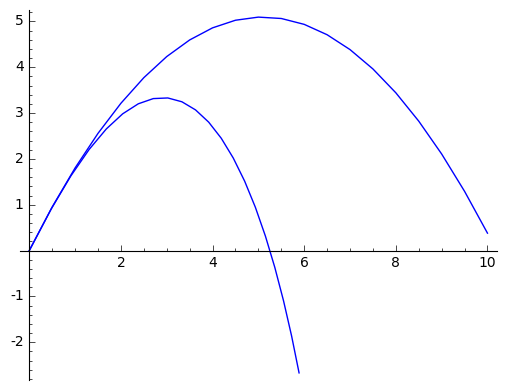

In [12]:
mondessin.show(aspect_ratio=1)

On sauve l'objet graphique dans un fichier pdf "pierre.pdf". On peut aussi utiliser l'extension .png, et le fichier sauvé sera alors automatiquement en png. On accède aux fichiers sauvegardés en cliquant sur "Files" en haut à gauche.

In [13]:
mondessin.save('pierre.pdf')